## Exercise 7 | Principle Component Analysis and K-Means Clustering
### ================= Part 1: Find Closest Centroids ====================
$$c^{(i)} = j, s.t. \min||x^{(i)} - \mu_j||^2$$

In [1]:
from ex7 import *
%matplotlib inline
print('Finding closest centroids.\n')

# Load an example dataset that we will be using
from scipy import io as sio
data = sio.loadmat('ex7data2.mat')
X = data['X']

# Select an initial set of centroids
K = 3 # 3 Centroids
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

# Find the closest centroids for the examples using the
# initial_centroids
idx = findClosestCentroids(X, initial_centroids)

print('Closest centroids for the first 3 examples: ')
print(idx[:3])
print('(the closest centroids should be 1, 3, 2 respectively)')

Finding closest centroids.

Closest centroids for the first 3 examples: 
[0 2 1]
(the closest centroids should be 1, 3, 2 respectively)


### ===================== Part 2: Compute Means =========================
$$\mu_k = \frac{1}{|C_k|}\sum_{i\in C_k}{x^{(i)}}$$

In [2]:
print('Computing centroids means.\n')

#  Compute means based on the closest centroids found in the previous part.
centroids = computeCentroids(X, idx, K)

print('Centroids computed after initial finding of closest centroids: ')
print(centroids)
print('(the centroids should be')
print('   [ 2.428301 3.157924 ]')
print('   [ 5.813503 2.633656 ]')
print('   [ 7.119387 3.616684 ]')

Computing centroids means.

Centroids computed after initial finding of closest centroids: 
[[2.428301 3.157924]
 [5.813503 2.633656]
 [7.119387 3.616684]]
(the centroids should be
   [ 2.428301 3.157924 ]
   [ 5.813503 2.633656 ]
   [ 7.119387 3.616684 ]


### =================== Part 3: K-Means Clustering ======================

Running K-Means clustering on example dataset.

K-Means iteration 1/10...
Press enter to continue.
K-Means iteration 2/10...
Press enter to continue.
K-Means iteration 3/10...
Press enter to continue.
K-Means iteration 4/10...
Press enter to continue.
K-Means iteration 5/10...
Press enter to continue.
K-Means iteration 6/10...
Press enter to continue.
K-Means iteration 7/10...
Press enter to continue.
K-Means iteration 8/10...
Press enter to continue.
K-Means iteration 9/10...
Press enter to continue.
K-Means iteration 10/10...
Press enter to continue.


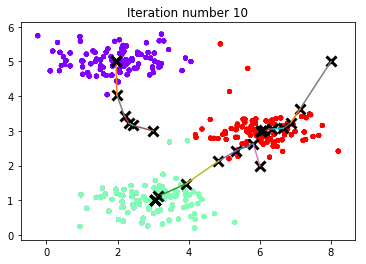

K-Means Done.


In [3]:
print('Running K-Means clustering on example dataset.\n')

# Load an example dataset
data = sio.loadmat('ex7data2.mat')
X = data['X']

# Settings for running K-Means
K = 3
max_iters = 10

# For consistency, here we set centroids to specific values
# but in practice you want to generate them automatically, such as by
# settings them to be random examples (as can be seen in
# kMeansInitCentroids).
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

# Run K-Means algorithm. The 'true' at the end tells our function to plot
# the progress of K-Means
centroids, idx = runkMeans(X, initial_centroids, max_iters, True)
print('K-Means Done.')

### ============= Part 4: K-Means Clustering on Pixels ===============

In [4]:
print('Running K-Means clustering on pixels from an image.\n')

#  Load an image of a bird
A = plt.imread('bird_small.png')

# If imread does not work for you, you can try instead
# data = sio.loadmat('bird_small.mat')
# A = data['A']

# Size of the image
img_size = A.shape

# Reshape the image into an Nx3 matrix where N = number of pixels.
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X that we will use K-Means on.
X = A.reshape((img_size[0] * img_size[1], 3))

# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 16
max_iters = 10

# When using K-Means, it is important the initialize the centroids
# randomly. 
# You should complete the code in kMeansInitCentroids.m before proceeding
initial_centroids = kMeansInitCentroids(X, K)

# Run K-Means
centroids, idx = runkMeans(X, initial_centroids, max_iters)

Running K-Means clustering on pixels from an image.

K-Means iteration 1/10...
K-Means iteration 2/10...
K-Means iteration 3/10...
K-Means iteration 4/10...
K-Means iteration 5/10...
K-Means iteration 6/10...
K-Means iteration 7/10...
K-Means iteration 8/10...
K-Means iteration 9/10...
K-Means iteration 10/10...


### ================= Part 5: Image Compression ======================

Applying K-Means to compress an image.



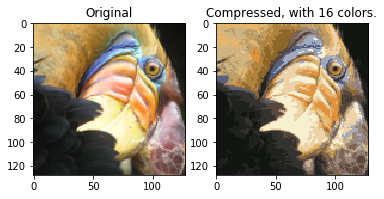

In [5]:
print('Applying K-Means to compress an image.\n')

# Find closest cluster members
idx = findClosestCentroids(X, centroids)

# Essentially, now we have represented the image X as in terms of the
# indices in idx. 

# We can now recover the image from the indices (idx) by mapping each pixel
# (specified by its index in idx) to the centroid value
X_recovered = centroids[idx]

# Reshape the recovered image into proper dimensions
X_recovered = X_recovered.reshape(img_size)

# Display the original image 
plt.subplot(1, 2, 1)
plt.imshow(A)
plt.title('Original')

# Display compressed image side by side
plt.subplot(1, 2, 2)
plt.imshow(X_recovered)
plt.title(f'Compressed, with {K} colors.')

plt.show()

###### 以上部分代码在[ex7.py](https://github.com/StevenPZChan/ml_dl_coursera_Andrew_Ng/blob/master/machine-learning-ex7/ex7.py)中

## Exercise 7 | Principle Component Analysis and K-Means Clustering
### ================== Part 1: Load Example Dataset  ===================

Visualizing example dataset for PCA.



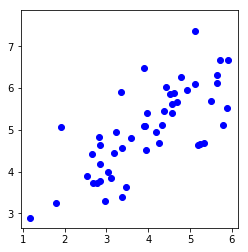

In [6]:
from ex7_pca import *
%matplotlib inline
print('Visualizing example dataset for PCA.\n')

#  The following command loads the dataset. You should now have the 
#  variable X in your environment
from scipy import io as sio
data = sio.loadmat('ex7data1.mat')
X = data['X']

#  Visualize the example dataset
plt.plot(X[:, 0], X[:, 1], 'bo')
plt.axis([0.5, 6.5, 2, 8])
plt.axis('square')
plt.show()

### =============== Part 2: Principal Component Analysis ===============
$$\Sigma = \frac{1}{m}X^TX$$
$$[U, S, V] = svd(\Sigma)$$

Running PCA on example dataset.



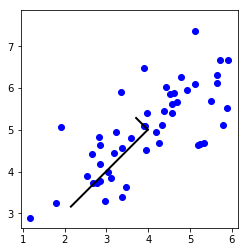

Top eigenvector: 
 U(:,1) = [-0.707107 -0.707107] 

(you should expect to see -0.707107 -0.707107)


In [7]:
print('Running PCA on example dataset.\n')

#  Before running PCA, it is important to first normalize X
X_norm, mu, sigma = featureNormalize(X)

#  Run PCA
U, S = pca(X_norm)

#  Compute mu, the mean of the each feature

#  Draw the eigenvectors centered at mean of data. These lines show the
#  directions of maximum variations in the dataset.
plt.plot(X[:, 0], X[:, 1], 'bo')
plt.axis([0.5, 6.5, 2, 8])
plt.axis('square')
drawLine(mu, mu + 1.5 * S[0, 0] * U[:, 0], '-k', linewidth=2)
drawLine(mu, mu + 1.5 * S[1, 1] * U[:, 1], '-k', linewidth=2)
plt.show()

print('Top eigenvector: ')
print(f' U(:,1) = {U[:, 0]} ')
print('\n(you should expect to see -0.707107 -0.707107)')

### =================== Part 3: Dimension Reduction ===================
$$z = U_{reduce}^Tx$$

Dimension reduction on example dataset.

Projection of the first example: 1.496313

(this value should be about 1.481274)

Approximation of the first example: -1.058053 -1.058053

(this value should be about  -1.047419 -1.047419)



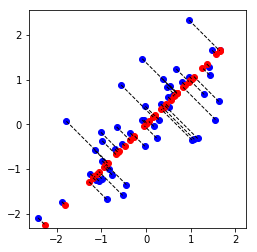

In [8]:
print('Dimension reduction on example dataset.\n')

#  Plot the normalized dataset (returned from pca)
plt.plot(X_norm[:, 0], X_norm[:, 1], 'bo')
plt.axis([-4, 3, -4, 3])
plt.axis('square')

#  Project the data onto K = 1 dimension
K = 1
Z = projectData(X_norm, U, K)
print(f'Projection of the first example: {Z[0, 0]:f}')
print('\n(this value should be about 1.481274)\n')

X_rec  = recoverData(Z, U, K)
print(f'Approximation of the first example: {X_rec[0, 0]:f} {X_rec[0, 1]:f}')
print('\n(this value should be about  -1.047419 -1.047419)\n')

#  Draw lines connecting the projected points to the original points
plt.plot(X_rec[:, 0], X_rec[:, 1], 'ro')
for i in range(X_norm.shape[0]):
    drawLine(X_norm[i], X_rec[i], '--k', linewidth=1)
plt.show()

### =============== Part 4: Loading and Visualizing Face Data =============

Loading face dataset.



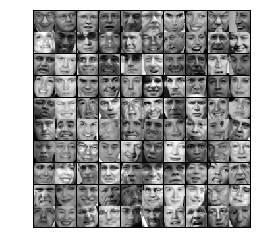

In [9]:
print('Loading face dataset.\n')

#  Load Face dataset
data = sio.loadmat('ex7faces.mat')
X = data['X']

#  Display the first 100 faces in the dataset
_ = displayData(X[:100])

### =========== Part 5: PCA on Face Data: Eigenfaces  ===================

Running PCA on face dataset.
(this might take a minute or two ...)



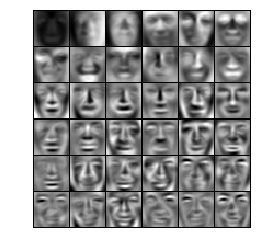

In [10]:
print('Running PCA on face dataset.\n'
         '(this might take a minute or two ...)\n')

#  Before running PCA, it is important to first normalize X by subtracting 
#  the mean value from each feature
X_norm, mu, sigma = featureNormalize(X)

#  Run PCA
U, S = pca(X_norm)

#  Visualize the top 36 eigenvectors found
_ = displayData(U.transpose()[:36])

### ============= Part 6: Dimension Reduction for Faces =================

In [11]:
print('Dimension reduction for face dataset.\n')

K = 100
Z = projectData(X_norm, U, K)

print(f'The projected data Z has a size of: {Z.shape} ')

Dimension reduction for face dataset.

The projected data Z has a size of: (5000, 100) 


### ==== Part 7: Visualization of Faces after PCA Dimension Reduction ====

Visualizing the projected (reduced dimension) faces.



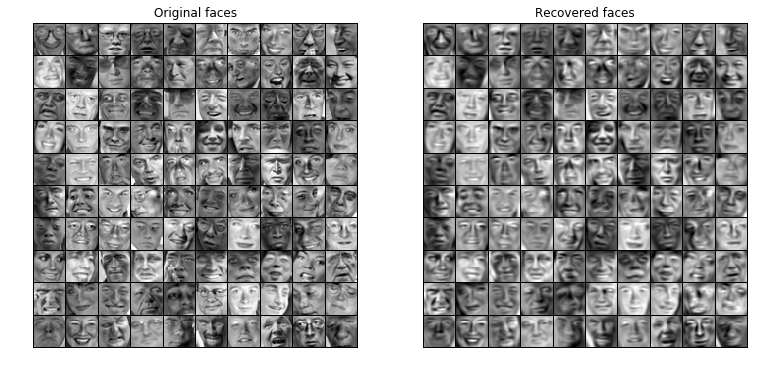

In [12]:
print('Visualizing the projected (reduced dimension) faces.\n')

K = 100
X_rec  = recoverData(Z, U, K)

# Display normalized data
plt.figure(figsize=(12.8, 9.6))
plt.subplot(1, 2, 1)
displayData(X_norm[:100])
plt.title('Original faces')
# plt.axis('square')

# # Display reconstructed data from only k eigenfaces
plt.subplot(1, 2, 2)
displayData(X_rec[:100])
plt.title('Recovered faces')
# plt.axis('square')

plt.show()

### === Part 8(a): Optional (ungraded) Exercise: PCA for Visualization ===

K-Means iteration 1/10...
K-Means iteration 2/10...
K-Means iteration 3/10...
K-Means iteration 4/10...
K-Means iteration 5/10...
K-Means iteration 6/10...
K-Means iteration 7/10...
K-Means iteration 8/10...
K-Means iteration 9/10...
K-Means iteration 10/10...


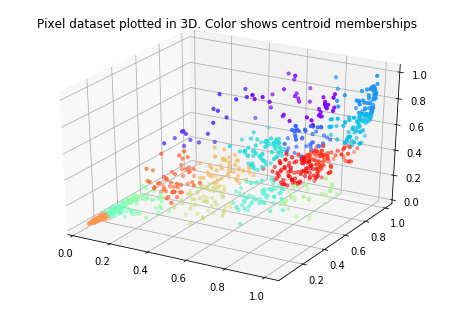

In [13]:
from ex7 import *
# Reload the image from the previous exercise and run K-Means on it
# For this to work, you need to complete the K-Means assignment first
A = plt.imread('bird_small.png')

# If imread does not work for you, you can try instead
# data = sio.loadmat('bird_small.mat')
# A = data['A']

img_size = A.shape
X = A.reshape((img_size[0] * img_size[1], 3))
K = 16
max_iters = 10
initial_centroids = kMeansInitCentroids(X, K)
centroids, idx = runkMeans(X, initial_centroids, max_iters)

#  Sample 1000 random indexes (since working with all the data is
#  too expensive. If you have a fast computer, you may increase this.
sel = np.random.randint(X.shape[0], size=1000)

#  Setup Color Palette
palette = plt.cm.get_cmap('rainbow', K)
# colors = palette(idx[sel])

#  Visualize the data and centroid memberships in 3D
from mpl_toolkits.mplot3d import Axes3D
ax = Axes3D(plt.figure())
ax.scatter(X[sel, 0], X[sel, 1], X[sel, 2], s=10, c=idx[sel], cmap=palette)
plt.title('Pixel dataset plotted in 3D. Color shows centroid memberships')
plt.show()

### === Part 8(b): Optional (ungraded) Exercise: PCA for Visualization ===

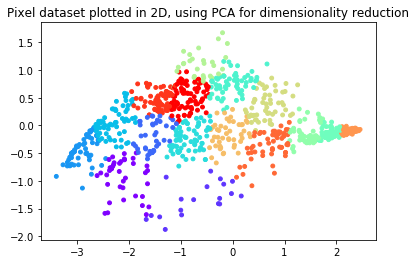

In [14]:
from ex7_pca import *
# Subtract the mean to use PCA
X_norm, mu, sigma = featureNormalize(X)

# PCA and project the data to 2D
U, S = pca(X_norm)
Z = projectData(X_norm, U, 2)

# Plot in 2D
plt.figure()
plotDataPoints(Z[sel], idx[sel], K)
plt.title('Pixel dataset plotted in 2D, using PCA for dimensionality reduction')
plt.show()

###### 以上部分代码在[ex7_pca.py](https://github.com/StevenPZChan/ml_dl_coursera_Andrew_Ng/blob/master/machine-learning-ex7/ex7_pca.py)中

### 总结：学会了`plt.cm.get_cmap`的用法，了解了`np.linalg.svd`的用法。